In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
#read csv data 
data = pd.read_csv('./dataset/bank-additional-full.csv',sep=';')

In [3]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
data.shape

(41188, 21)

In [5]:
#cek duplicate
print(sum(data.duplicated()))

12


In [6]:
#drop duplicate, new data shape
data.drop_duplicates(inplace=True)
data.shape

(41176, 21)

In [7]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

Thera are 10 categorical coloumns, 10 numerical columns, and 1 target columns

Input variables:

#bank client data

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

#Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [8]:
#droping column "duration"
data.drop(['duration'], axis=1, inplace=True)

In [9]:
#check missing values
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing values in data

In [10]:
#features columns
X=data.drop('y',axis=1)
X=pd.get_dummies(X)
y=data['y'] #label
X.head()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
#split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2) # 80% training and 20% test

print('train size:', X_train.shape)
print('test size:' , X_test.shape)

train size: (32940, 62)
test size: (8236, 62)


In [12]:
#def train model
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)

    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)

    print('---training performance---')
    print('target:\n', y_train[:10])
    print('prediction:\n', train_pred[:10])
    print('accuracy score:', train_acc)
    print()
    print('---test performance---')
    print('target:\n', y_test[:10])
    print('prediction:\n', test_pred[:10])
    print('accuracy score:', test_acc)
    
    print(classification_report(y_test, test_pred))

In [13]:
#train in many models 
logistic = LogisticRegression()
knn = KNeighborsClassifier()
bayes = GaussianNB()
dtree = DecisionTreeClassifier()
forest = RandomForestClassifier()
svc = SVC()


for model in [logistic, knn, bayes, dtree, forest, svc]:
    print('train', model.__class__)
    train_model(model,X_train,X_test,y_train,y_test)
    print('=====================')

train <class 'sklearn.linear_model._logistic.LogisticRegression'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---training performance---
target:
 33410     no
16683    yes
20603     no
27976     no
38994     no
8930      no
6674      no
14402     no
20662     no
15057     no
Name: y, dtype: object
prediction:
 ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
accuracy score: 0.8992410443230116

---test performance---
target:
 13476     no
19269     no
35809     no
32757     no
34354     no
11497     no
28942     no
39637    yes
35463     no
1996      no
Name: y, dtype: object
prediction:
 ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
accuracy score: 0.9008013598834386
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7340
         yes       0.65      0.19      0.30       896

    accuracy                           0.90      8236
   macro avg       0.78      0.59      0.62      8236
weighted avg       0.88      0.90      0.88      8236

train <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
---training performance---

In [14]:
#accuracy score
logreg_acc = logistic.score(X,y)
knn_acc = knn.score(X,y)
bayes_acc = bayes.score(X,y)
dtree_acc = dtree.score(X,y)
forest_acc = forest.score(X,y)
svc_acc = svc.score(X,y)

In [15]:
acc_model = pd.DataFrame({
    'Model' : ['Logstic Regression', 'KNeighbors Classifier','Naive Bayes Classifier','Decision Tree Classifier', 'Random Forest Classifier', "SVM"],
    'Accuracy' : [logreg_acc,knn_acc,bayes_acc,dtree_acc,forest_acc,svc_acc]
})

                          Accuracy
Model                             
Random Forest Classifier  0.974888
Decision Tree Classifier  0.964761
KNeighbors Classifier     0.908029
Logstic Regression        0.899553
SVM                       0.897513
Naive Bayes Classifier    0.855911


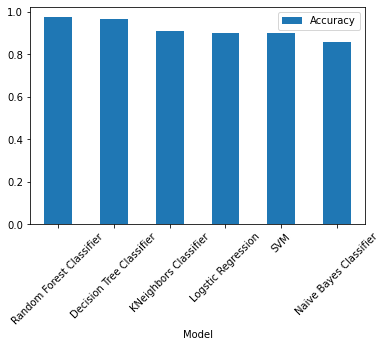

In [16]:
acc_model = acc_model.sort_values(by= ['Accuracy'], ascending=False)
print(acc_model.set_index('Model'))

acc_model.set_index('Model').plot(kind='bar')

plt.xticks(rotation=45)

plt.show()

We could use Random Forest Classifier model since high accuracy score to predict client bank subscription 

In [17]:
#immportance features
feature_imp = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)

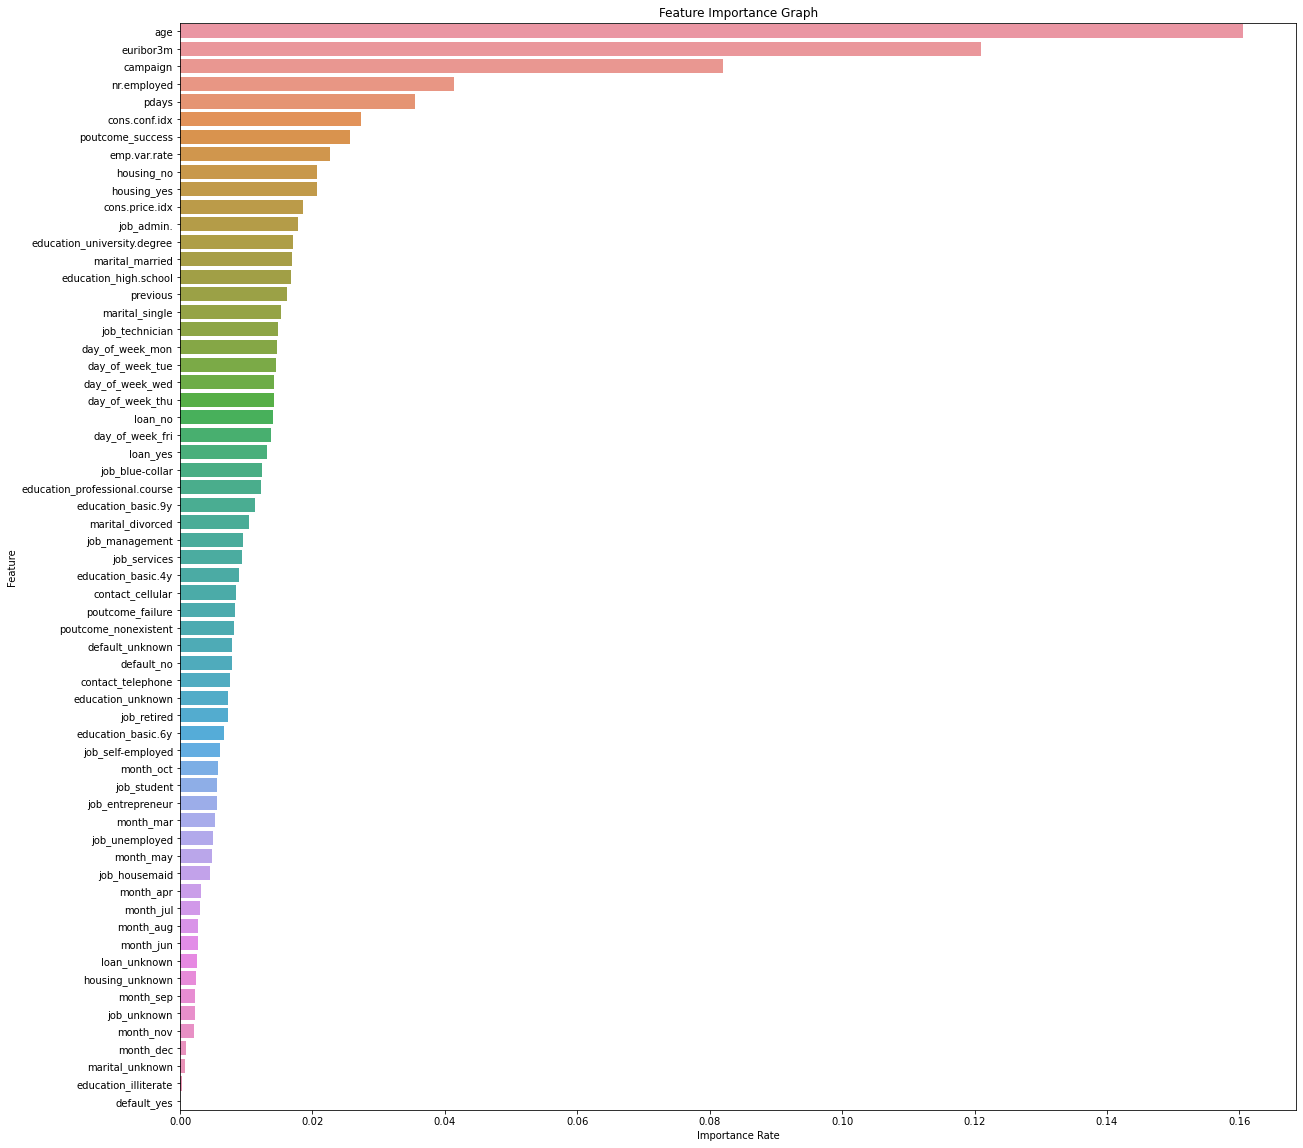

In [18]:
#plotting feature of importances
plt.figure(figsize=(20,20))
sns.barplot(feature_imp, y=feature_imp.index)
plt.title('Feature Importance Graph')
plt.xlabel('Importance Rate')
plt.ylabel('Feature')
plt.show()

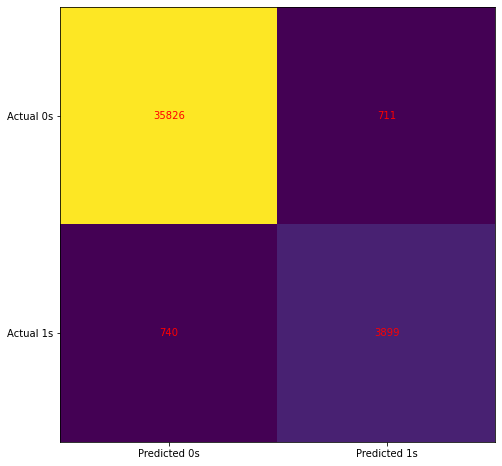

In [22]:
cm = confusion_matrix(y,dtree.predict(X))

fig, ax =plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels= ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha='center',va='center',color='red')
plt.show()